### Import Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [92]:
df = pd.read_csv('../data/Dataset Datathon IPO - Main.csv')

df.head()

,Ticker,Nama Perusahaan,Tanggal Listing,Sektor,Underwriter,Kategori Pemilik,Listed Share,Persen Saham Ditawarkan,Rencana Penggunaan Dana IPO,Valuation Currency,...,Pendapatan,Laba Kotor,Laba Operasional/ Laba Usaha,Laba Berjalan (Bukan Komperhensif),Harga Final,1D %,1W %,1M %,6M %,1Y %
0,UNIQ,PT Ulima Nitra Tbk,8 Mar 2021,Energy,PT Surya Fajar Sekuritas,lainnya,3138983000,0.9560,modal kerja,rupiah,...,2.709260e+11,2.454700e+10,4.980000e+09,-5.617000e+09,118,0.35,0.35,0.05,-0.25,-0.30
1,ARCI,PT Archi Indonesia Tbk,28 Jun 2021,Basic Materials,PT BNI Sekuritas; PT Mandiri Sekuritas; PT Cit...,lainnya,24835000000,0.1500,bayar hutang,usd,...,4.960332e+12,2.710668e+12,2.639656e+12,1.486734e+12,750,0.01,0.00,-0.08,-0.27,-0.54
2,MASB,PT Bank Multiarta Sentosa Tbk,30 Jun 2021,Financials,PT BCA Sekuritas,lainnya,1226902970,0.1500,modal kerja,rupiah,...,1.212226e+12,4.313568e+11,1.688957e+11,1.081917e+11,3360,0.25,0.03,0.00,0.05,0.04
3,BMHS,PT Bundamedik Tbk,6 Jul 2021,Healthcare,PT Ciptadana Sekuritas Asia,lainnya,8603416176,0.0726,bayar hutang,rupiah,...,1.148144e+12,NaN,NaN,1.184601e+11,340,0.25,2.01,2.03,1.31,0.74
4,UVCR,PT Trimegah Karya Pratama Tbk,27 Jul 2021,Technology,PT Surya Fajar Sekuritas; PT Mirae Asset Sekur...,lainnya,2000000000,0.2500,modal belanja,rupiah,...,1.944867e+11,4.634337e+09,NaN,5.434916e+08,100,0.10,0.60,3.74,2.28,0.43


### Data Preprocessing & Exploratory Data Analysis

- Check columns

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Kategori Pemilik                    223 non-null    object 
 6   Listed Share                        223 non-null    int64  
 7   Persen Saham Ditawarkan             223 non-null    float64
 8   Rencana Penggunaan Dana IPO         223 non-null    object 
 9   Valuation Currency                  223 non-null    object 
 10  Total Aset                          223 non-null    int64  
 11  Total Liabilitas                    223 non-n

- Statistical Descriptive

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listed Share,223.0,1.390436e+10,8.073907e+10,4.540000e+08,1.810827e+09,3.169200e+09,6.728333e+09,1.184364e+12
Persen Saham Ditawarkan,223.0,2.027996e-01,8.038259e-02,2.170000e-02,1.512500e-01,2.000000e-01,2.471500e-01,9.560000e-01
Total Aset,223.0,3.593547e+12,1.424831e+13,1.249215e+10,7.866021e+10,2.370816e+11,1.191926e+12,1.482127e+14
Total Liabilitas,223.0,2.615599e+12,1.744911e+13,0.000000e+00,2.217956e+10,9.518418e+10,4.979021e+11,2.495767e+14
Pendapatan,221.0,8.146612e+11,3.246698e+12,1.761944e+08,2.920522e+10,1.156690e+11,4.534965e+11,4.405792e+13
Laba Kotor,217.0,3.065610e+11,1.842433e+12,-9.221410e+11,7.841266e+09,2.432151e+10,8.756900e+10,2.551314e+13
Laba Operasional/ Laba Usaha,137.0,2.865812e+11,2.094187e+12,-2.415073e+12,1.968000e+09,6.803612e+09,2.938755e+10,2.377811e+13
Laba Berjalan (Bukan Komperhensif),212.0,1.026349e+11,1.363168e+12,-8.169471e+12,5.565912e+08,5.003863e+09,2.630541e+10,1.710513e+13
Harga Final,223.0,3.332960e+02,6.099305e+02,7.000000e+01,1.050000e+02,1.490000e+02,2.600000e+02,5.550000e+03
1D %,223.0,1.588789e-01,1.675206e-01,-3.500000e-01,2.000000e-02,1.700000e-01,3.400000e-01,3.500000e-01


##### Handle Missing Values

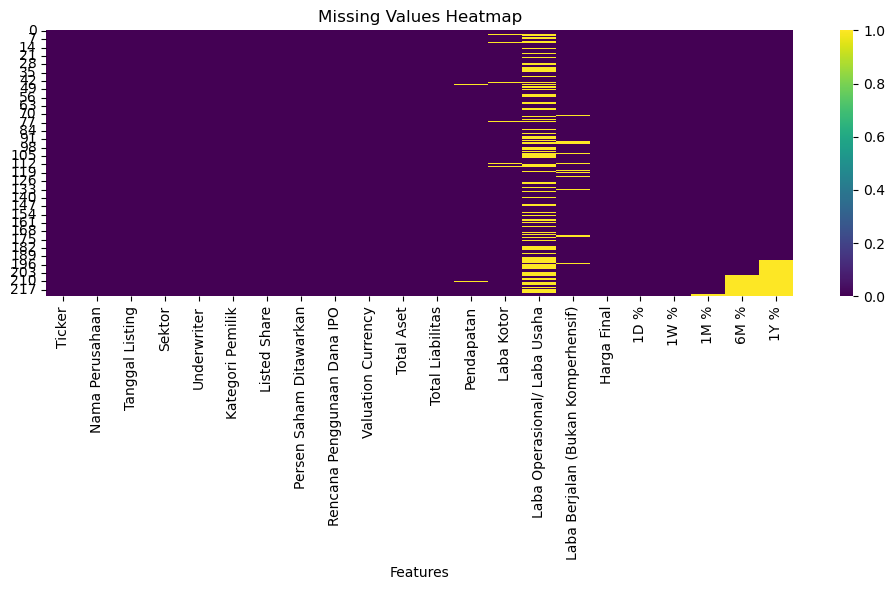

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

- Impute using MICE Approach

In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42, max_iter=100)

df_train = df.loc[:,['Listed Share',
                     'Persen Saham Ditawarkan',
                     'Total Aset',
                     'Total Liabilitas',
                     'Pendapatan',
                     'Laba Kotor',
                     'Laba Operasional/ Laba Usaha',
                     'Laba Berjalan (Bukan Komperhensif)',
                     'Harga Final']]

# train imputer
imputer.fit(df_train)

# transform the data
df_imputed = imputer.transform(df_train)

# put the data into the dataframe
df.loc[:,['Listed Share',
                     'Persen Saham Ditawarkan',
                     'Total Aset',
                     'Total Liabilitas',
                     'Pendapatan',
                     'Laba Kotor',
                     'Laba Operasional/ Laba Usaha',
                     'Laba Berjalan (Bukan Komperhensif)',
                     'Harga Final']] = df_imputed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Kategori Pemilik                    223 non-null    object 
 6   Listed Share                        223 non-null    int64  
 7   Persen Saham Ditawarkan             223 non-null    float64
 8   Rencana Penggunaan Dana IPO         223 non-null    object 
 9   Valuation Currency                  223 non-null    object 
 10  Total Aset                          223 non-null    int64  
 11  Total Liabilitas                    223 non-n

##### Data Preprocessing

- Tanggal (ubah jadi 3 kolom)

In [97]:
df['Tanggal Listing'] = pd.to_datetime(df['Tanggal Listing'])
df['Tahun Listing'] = df['Tanggal Listing'].dt.year
df['Bulan Listing'] = df['Tanggal Listing'].dt.month
df['Hari Listing'] = df['Tanggal Listing'].dt.day
df = df.drop('Tanggal Listing', axis=1)

- Hapus kolom yang tidak relevan

In [98]:
df = df.drop(['Ticker', 'Nama Perusahaan'], axis=1)

- Encoding

In [99]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

##### Features Engineering

In [100]:
df_clean = df.copy()
epsilon = 1e-6 

df_clean['Total Equity'] = df_clean['Total Aset'] - df_clean['Total Liabilitas']
df_clean['EPS'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Listed Share'] + epsilon)
df_clean['Revenue per Share'] = df_clean['Pendapatan'] / (df_clean['Listed Share'] + epsilon)
df_clean['Solvency'] = df_clean['Total Liabilitas'] / (df_clean['Total Aset'] + epsilon)
df_clean['ROA'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Total Aset'] + epsilon)
df_clean['ROE'] = df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Total Equity'] + epsilon)
df_clean['Gross Profit Margin'] = (df_clean['Laba Kotor'] / (df_clean['Pendapatan'] + epsilon)) * 100
df_clean['Operating Profit Margin'] = (df_clean['Laba Operasional/ Laba Usaha'] / (df_clean['Pendapatan'] + epsilon)) * 100
df_clean['Net Profit Margin'] = (df_clean['Laba Berjalan (Bukan Komperhensif)'] / (df_clean['Pendapatan'] + epsilon)) * 100

df_clean.replace([np.inf, -np.inf], 0, inplace=True)
df_clean.fillna(0, inplace=True)

### Modelling

In [101]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['Harga Final', '1D %', '1W %', '1M %', '6M %', '1Y %'], axis=1)
y = df_clean['Harga Final']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Menerapkan IsolationForest untuk Outlier Deletion

In [102]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

iso_forest.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

In [103]:
train_outlier_preds = iso_forest.predict(X_train)
test_outlier_preds = iso_forest.predict(X_test)

X_train_before = len(X_train)
X_test_before = len(X_test)

X_train = X_train[train_outlier_preds == 1]
y_train = y_train[train_outlier_preds == 1]

X_test = X_test[test_outlier_preds == 1]
y_test = y_test[test_outlier_preds == 1]

print(f"Data Latih: {X_train_before - len(X_train)} outlier dihapus. Sisa: {len(X_train)} baris.")
print(f"Data Uji: {X_test_before - len(X_test)} outlier dihapus. Sisa: {len(X_test)} baris.")

Data Latih: 18 outlier dihapus. Sisa: 160 baris.
Data Uji: 5 outlier dihapus. Sisa: 40 baris.


- Training

In [104]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.2520
RMSE: 220.9312
MAE: 130.0310
MAPE: 0.5150


### LIME

In [106]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Harga Final'],
    mode='regression'
)

instance_to_explain = X_test.iloc[0] 
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=model.predict,
    num_features=10
)

explanation.save_to_file('../lime/lime_explanation.html')

d:\Conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\Conda\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
d:\Conda\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  binary_column = (inverse_c